### Discrete distributions:

In [24]:
from IPython.display import display, Math, Latex, Markdown
import matplotlib.pyplot as plt
import numpy as np,pandas as pd
from scipy.stats import binom,poisson,geom,bernoulli
import seaborn as sbn


##### Binomial:

- Describes the distribution of a variable that can only take two values: 0/1
- For **n** trials
- The probability of getting one outcome per trial is **b**
- The result is the probability of getting **k** successes of that outcome.

In [22]:
#display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
#display(Math(r'PDF:  \begin{cases} \frac{1}{b-a}&\text{for $x\in[a,b]$}\\0&\text{otherwise}\\\end{cases}'))            
Latex(r"""$$
\textbf{Formulation:  } 
X \sim Bin(n,p) \\
P(k) = P(X = k) = {n \choose k} p^k(1-p)^{n-k} \\
\textbf{Properties}: \\
 \mu = np \\
 \sigma^2 = np(1-p) \\

$$""")


<IPython.core.display.Latex object>

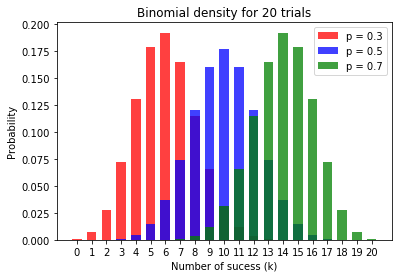

In [110]:
n = 20 # num of trials
x = [i for i in range(0,n+1)] # support vector

# plot config : 
w= 0.65
a = 0.75


p = 0.3 # probability of sucess
rv = binom(n, p)
prob = rv.pmf(x)
ax = plt.bar(x,prob,color = 'red', width=w,alpha = a)

p = 0.5 # probability of sucess
rv = binom(n, p)
prob = rv.pmf(x)
ax = plt.bar(x,prob,color = 'blue', width=w,alpha = a)


p = 0.7 # probability of sucess
rv = binom(n, p)
prob = rv.pmf(x)
ax = plt.bar(x,prob,color = 'green', width=w,alpha =a)
plt.legend(['p = 0.3','p = 0.5','p = 0.7'])
plt.xlabel('Number of sucess (k)')
plt.ylabel('Probability')
plt.xticks(x)
plt.title(f"Binomial density for {n} trials")
plt.show()


In [144]:
Latex(r"""$$
\textbf{Formulation:  } 
CDF(Bin(n,p)) \\
F(k) = P(X \leq k) = \sum_{i=0}^{k}  {n \choose i} p^i(1-p)^{n-i} \\
$$""")

<IPython.core.display.Latex object>

In [145]:
import plotly.express as px
n = 20 # num of trials
x = [i for i in range(0,n+1)] # support vector

p = 0.3
prob = pd.DataFrame([])
prob[f'p = {p}'] = binom.cdf(x, n, p)
p = 0.5
prob[f'p = {p}'] = binom.cdf(x, n, p)
p = 0.7
prob[f'p = {p}'] = binom.cdf(x, n, p)
     
# List arguments
fig = px.scatter(prob,title=f"Binomial CDF for {n} trials")
fig.show()


CDF graph interpretation: The x axis represents the number k of sucess in n Trials. 
The y axis represents the probability of achive k or less sucess.


##### Bernoulli:

In [22]:
Latex(r"""$$
P(X = 1) = p, P(X = 0) = 1-p \\
pmf- $ p^x(1-p)^{1-x} \\
\mu = p \\
\sigma^2 = p(1-p) \\$$""")

<IPython.core.display.Latex object>

##### Poison:

In [18]:
Latex(r"""$$
X \sim P(\lambda) \rightarrow p(k) = e^{-\lambda}\frac{\lambda^k}{k!} \\
\mu = \lambda \\
\sigma^2 = \lambda \\
P(np) \approx Bin(n,p) \\$$""")

<IPython.core.display.Latex object>

In [ ]:
fig, ax = plt.subplots(1, 1)
mu = 0.73
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
rv = poisson(mu)
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.vlines(x , 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()


##### Geometric:

In [25]:
Latex(r"""$$
X \sim  Geom(p) \rightarrow p(k) = (1-p)^{k-1}p \\
 \mu = \frac{1}{p} \\
 \sigma^2 = \frac{1-p}{p^2} \\
\cdot Geometric distribution is memoryless \\$$""")

<IPython.core.display.Latex object>

##### Pareto:

In [ ]:
fig, ax = plt.subplots(1, 1)
b = 2.62

mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0.01, b),

                pareto.ppf(0.99, b), 100)

ax.plot(x, pareto.pdf(x, b),

       'r-', lw=5, alpha=0.6, label='pareto pdf')
rv = pareto(b)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = pareto.ppf([0.001, 0.5, 0.999], b)

np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))
r = pareto.rvs(b, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()